In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('diabetes.csv',sep=',')

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [28]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
bins=np.arange(0,70,10)
bins

array([ 0, 10, 20, 30, 40, 50, 60])

In [30]:
df['Age']=pd.cut(df.Age,bins=bins)

In [31]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,"(40.0, 50.0]",1
1,1,85,66,29,0,26.6,0.351,"(30.0, 40.0]",0
2,8,183,64,0,0,23.3,0.672,"(30.0, 40.0]",1
3,1,89,66,23,94,28.1,0.167,"(20.0, 30.0]",0
4,0,137,40,35,168,43.1,2.288,"(30.0, 40.0]",1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,NaN,0
764,2,122,70,27,0,36.8,0.340,"(20.0, 30.0]",0
765,5,121,72,23,112,26.2,0.245,"(20.0, 30.0]",0
766,1,126,60,0,0,30.1,0.349,"(40.0, 50.0]",1


In [32]:
df=pd.get_dummies(df,columns=['Age'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,"Age_(0, 10]","Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]"
0,6,148,72,35,0,33.6,0.627,1,0,0,0,0,1,0
1,1,85,66,29,0,26.6,0.351,0,0,0,0,1,0,0
2,8,183,64,0,0,23.3,0.672,1,0,0,0,1,0,0
3,1,89,66,23,94,28.1,0.167,0,0,0,1,0,0,0
4,0,137,40,35,168,43.1,2.288,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,0,0,0,0,0,0,0
764,2,122,70,27,0,36.8,0.340,0,0,0,1,0,0,0
765,5,121,72,23,112,26.2,0.245,0,0,0,1,0,0,0
766,1,126,60,0,0,30.1,0.349,1,0,0,0,0,1,0


In [33]:
y=df.Outcome
x=df.drop('Outcome',axis=1)
x
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [36]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,"Age_(0, 10]","Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]"
402,5,136,84,41,88,35.0,0.286,0,0,0,1,0,0
748,3,187,70,22,200,36.4,0.408,0,0,0,1,0,0
606,1,181,78,42,293,40.0,1.258,0,0,1,0,0,0
253,0,86,68,32,0,35.8,0.238,0,0,1,0,0,0
361,5,158,70,0,0,29.8,0.207,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,0,189,104,25,0,34.3,0.435,0,0,0,0,1,0
165,6,104,74,18,156,29.9,0.722,0,0,0,0,1,0
7,10,115,0,0,0,35.3,0.134,0,0,1,0,0,0
219,5,112,66,0,0,37.8,0.261,0,0,0,0,1,0


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()

In [39]:
scaler.fit(x_train)

StandardScaler()

In [40]:
scaler.mean_

array([3.78584730e+00, 1.20871508e+02, 6.82737430e+01, 1.98640596e+01,
       7.47337058e+01, 3.18484171e+01, 4.64761639e-01, 0.00000000e+00,
       0.00000000e+00, 5.60521415e-01, 2.02979516e-01, 1.37802607e-01,
       6.14525140e-02])

In [41]:
scaler.var_

array([1.12483658e+01, 9.84242335e+02, 4.04768640e+02, 2.64776678e+02,
       1.22789924e+04, 6.50690152e+01, 1.09666405e-01, 0.00000000e+00,
       0.00000000e+00, 2.46337158e-01, 1.61778832e-01, 1.18813049e-01,
       5.76761025e-02])

In [42]:
x_train=scaler.transform(x_train)

In [43]:
x_train

array([[ 0.36201669,  0.48221932,  0.78166729, ...,  1.98156643,
        -0.39978396, -0.25588316],
       [-0.23431142,  2.10783978,  0.08580291, ...,  1.98156643,
        -0.39978396, -0.25588316],
       [-0.83063952,  1.91659031,  0.4834397 , ..., -0.50465126,
        -0.39978396, -0.25588316],
       ...,
       [ 1.85283696, -0.18715381, -3.39351899, ..., -0.50465126,
        -0.39978396, -0.25588316],
       [ 0.36201669, -0.28277854, -0.11301548, ..., -0.50465126,
         2.50135099, -0.25588316],
       [-0.83063952,  0.03597057, -0.21242468, ..., -0.50465126,
        -0.39978396, -0.25588316]])

In [44]:
x_train[:,0].mean()

-4.6310979053265376e-17

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model=DecisionTreeClassifier()

In [52]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
from sklearn.tree import plot_tree

AttributeError: 'LogisticRegression' object has no attribute 'tree_'

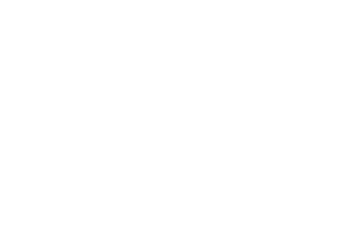

In [70]:
plot_tree(model)

In [53]:
y_hat=model.predict(x_test)
y_hat

C:\Users\Lenovo\Desktop\module2\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_test,y_hat)

array([[  3, 139],
       [  4,  85]], dtype=int64)

In [56]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [57]:
precision_score(y_test,y_hat)

0.3794642857142857

In [58]:
recall_score(y_test,y_hat)

0.9550561797752809

In [59]:
accuracy_score(y_test,y_hat)

0.38095238095238093

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [62]:
x_test.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age_(0, 10]', 'Age_(10, 20]',
       'Age_(20, 30]', 'Age_(30, 40]', 'Age_(40, 50]', 'Age_(50, 60]'],
      dtype='object')

In [63]:
model.coef_

array([[ 0.34037887,  1.07225032, -0.31741456,  0.19087569, -0.2730026 ,
         0.59985547,  0.28646628,  0.        ,  0.        ,  0.14717009,
         0.41624801,  0.44633594,  0.27652641]])

In [64]:
list(zip(x_test.columns,model.coef_.flatten()))

[('Pregnancies', 0.3403788721721005),
 ('Glucose', 1.0722503198393363),
 ('BloodPressure', -0.3174145550857789),
 ('SkinThickness', 0.19087568702166183),
 ('Insulin', -0.2730026012150515),
 ('BMI', 0.5998554698845663),
 ('DiabetesPedigreeFunction', 0.28646627946123066),
 ('Age_(0, 10]', 0.0),
 ('Age_(10, 20]', 0.0),
 ('Age_(20, 30]', 0.1471700907515562),
 ('Age_(30, 40]', 0.41624801105926357),
 ('Age_(40, 50]', 0.4463359353627189),
 ('Age_(50, 60]', 0.27652640514283444)]

([<matplotlib.axis.XTick at 0x25e4dd4ac70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

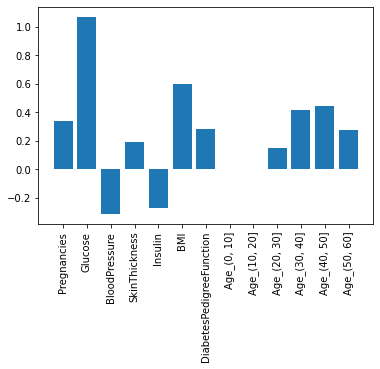

In [65]:
plt.bar(x_test.columns,model.coef_.flatten())
plt.xticks(x_test.columns,rotation=90)